# <p style="background-color:#13599b ;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Project: Heart Disease Prediction</p>

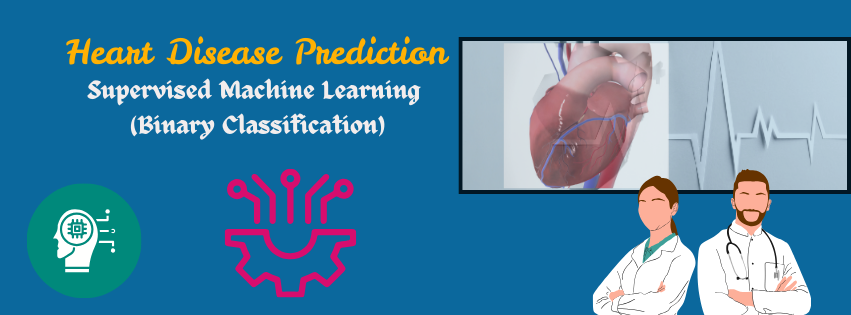

<p style="background-color:#1877c5;font-family:'Times New Roman', serif;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Index</p>

<ul style="list-style-type:upper-roman;">
    <li><a href="#1">Import Libraries</a></li>
    <li><a href="#2">Import and Load Dataset</a></li>
    <li><a href="#3">Exploratory Data Analysis (EDA)</a>
    <li><a href="#4">Data Preprocessing</a></li>
    <li><a href="#5">Oversampling(SMOTETomek) over Imbalance Dataset</a></li>
    <li><a href="#6">Train, Evaluate and Compare Classification Models without Hyperparameter Tuning</a></li>
    <li><a href="#7">Hyperparameter Tuning with GridSearchCV</a></li>
    <li><a href="#8">Train, Evaluate and Compare Classification Models with Hyperparameter Tuning</a></li>
    <li><a href="#9">Summary</a></li>
    
</ul>


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import Libaries</p>

In [8]:
# Importing pandas for data manipulation
import pandas as pd  
# Importing numpy for numerical operations
import numpy as np  
# Importing matplotlib for creating visualizations
import matplotlib.pyplot as plt  
# Importing seaborn for statistical data visualization
import seaborn as sns  
# Importing LabelEncoder for converting categorical labels to numeric labels
from sklearn.preprocessing import LabelEncoder  
# Importing is_numeric_dtype to check if a column is numeric
from pandas.core.dtypes.common import is_numeric_dtype 
# Enabling inline plotting for Jupyter Notebooks
%matplotlib inline 
# Importing SMOTETomek for handling imbalanced datasets by combining SMOTE and Tomek links
from imblearn.combine import SMOTETomek  
# Importing train_test_split to split the data into training and test sets
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Importing Logistic Regression and SVM
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC

# Importing Other Linear Models
from sklearn.linear_model import SGDClassifier

# Importing K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Importing Tree-Based Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Boosting Models
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Importing Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importing Metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    accuracy_score, 
    mean_squared_error, 
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    auc, 
    roc_curve, 
    roc_auc_score, 
    mean_absolute_error
)

# Importing Pipeline and Hyperparameter Tuning Tools
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  # To avoid deprecated warning messages


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import and Load Dataset</p>


In [9]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/Heart Disease.csv')
df.head(5)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>


<h3> 📌 Dataset Overview:</h3>

In [10]:
df_shape = df.shape
heart_disease_counts = df['HeartDisease'].value_counts()
object_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=np.number).columns

print(f"Shape of Dataset: {df_shape}")
print(f"HeartDisease State: \n{heart_disease_counts}\n")
print(f"columns consists of Object Data: \n{object_columns}\n")
print(f"columns consists of Numeric Data: \n{numeric_columns}\n")
print(f"List of Columns Name: {df.columns}")
print(f"Number of Columns: {len(df.columns)}")
print(f"Count the Colums with respect to Data Type: \n{df.dtypes.value_counts()}")
print(f"List of Data Type of Different Columns \n {df.dtypes}")

Shape of Dataset: (319795, 18)
HeartDisease State: 
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

columns consists of Object Data: 
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

columns consists of Numeric Data: 
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

List of Columns Name: Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Number of Columns: 18
Count the Colums with respect to Data Type: 
object     14
float64     4
Name: count, dtype: int64
List of Data Type of Different Columns 
 HeartDisease         obj

<h3>📌 Missing value Analysis </h3>

In [11]:
#store dataset
df1=df.copy()


#Handling Missing Value

missing_value=df1.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(18)

,missing,percent
HeartDisease,0,0.0
BMI,0,0.0
KidneyDisease,0,0.0
Asthma,0,0.0
SleepTime,0,0.0
GenHealth,0,0.0
PhysicalActivity,0,0.0
Diabetic,0,0.0
Race,0,0.0
AgeCategory,0,0.0


<h3>📌 Remove Duplicates </h3>

In [12]:
#drop duplicates
df1.drop_duplicates(inplace=True)
print(f"Shape of Dataset after removing duplicates: {df1.shape}")


Shape of Dataset after removing duplicates: (301717, 18)


<h3>📌 Target Column Condition </h3>

In [13]:
print(f"Status of Target Columns: \n {df1['HeartDisease'].value_counts()}")

Status of Target Columns: 
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64


<h3>📌 Explore Dataset for numerical value and retraeted outliers </h3>

In [14]:
#for numerical
df1.select_dtypes(include=np.number).describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


<h3>📌 Quantile and Inter Quantile Range </h3>

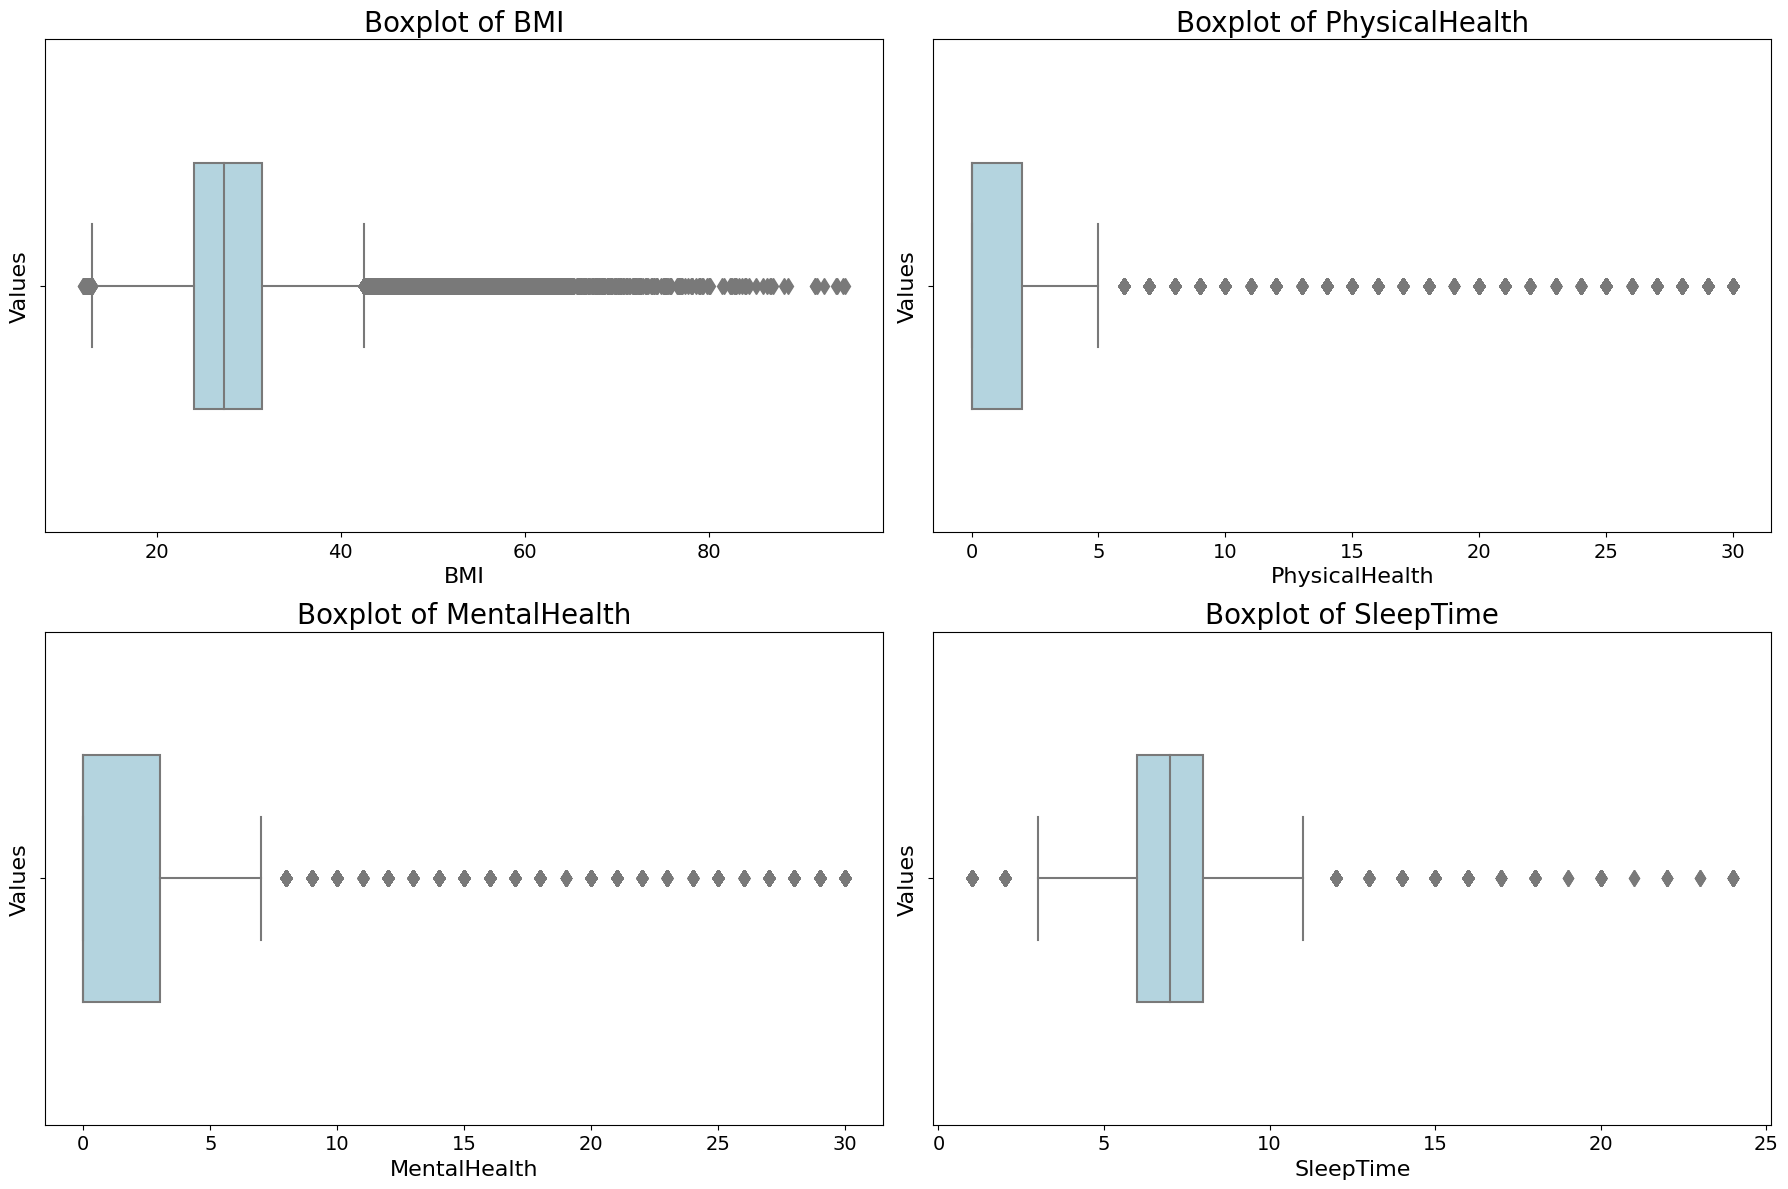

In [15]:
# Select numerical columns
df1 = df.copy()
numeric_columns = df1.select_dtypes(include=['number']).columns

# BoxPlot for Numerical Column
plt.figure(figsize=(18, 12))

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Adjust number of rows and columns as per the number of numeric columns
    sns.boxplot(data=df1, x=col, color='lightblue', width=0.5, fliersize=8, linewidth=1.5)
    
    # Set titles and labels with increased font size
    plt.title(f"Boxplot of {col}", fontsize=20)  # Increase title font size
    plt.xlabel(col, fontsize=16)  # Increase x-label font size
    plt.ylabel('Values', fontsize=16)  # Increase y-label font size
    
    # Increase tick label font size
    plt.xticks(fontsize=14)  # Increase x-axis tick font size
    plt.yticks(fontsize=14)  # Increase y-axis tick font size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [16]:
df1 = df.copy()

# Iterate through each column and check for numerical columns
for col in df1.select_dtypes(include=['number']).columns:  # Select only numeric columns
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = q3 - q1
    
    # Calculate the lower and upper limit for outliers
    llp = q1 - 1.5 * IQR  # Lower Limit of Potential Outliers
    ulp = q3 + 1.5 * IQR  # Upper Limit of Potential Outliers
    
    # Print the outlier detection information for the current numeric column
    print(f"Column: {col}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Limit of Potential Outliers (LLP): {llp}")
    print(f"Upper Limit of Potential Outliers (ULP): {ulp}")
    print("-" * 50)  # Separator for readability
    
    # Filter out the outliers for each numeric column
    df1 = df1[~((df1[col] < llp) | (df1[col] > ulp))]

# If you want to check the IQR for the entire dataframe (numerical columns only)
Q1_all = df1.select_dtypes(include=['number']).quantile(0.25)
Q3_all = df1.select_dtypes(include=['number']).quantile(0.75)
IQR_all = Q3_all - Q1_all

# Print the overall IQR for numerical columns
print("Overall DataFrame IQR (Numerical Columns Only):")
print(IQR_all)


Column: BMI
Q1 (25th percentile): 24.03
Q3 (75th percentile): 31.42
IQR: 7.390000000000001
Lower Limit of Potential Outliers (LLP): 12.945
Upper Limit of Potential Outliers (ULP): 42.505
--------------------------------------------------
Column: PhysicalHealth
Q1 (25th percentile): 0.0
Q3 (75th percentile): 2.0
IQR: 2.0
Lower Limit of Potential Outliers (LLP): -3.0
Upper Limit of Potential Outliers (ULP): 5.0
--------------------------------------------------
Column: MentalHealth
Q1 (25th percentile): 0.0
Q3 (75th percentile): 2.0
IQR: 2.0
Lower Limit of Potential Outliers (LLP): -3.0
Upper Limit of Potential Outliers (ULP): 5.0
--------------------------------------------------
Column: SleepTime
Q1 (25th percentile): 6.0
Q3 (75th percentile): 8.0
IQR: 2.0
Lower Limit of Potential Outliers (LLP): 3.0
Upper Limit of Potential Outliers (ULP): 11.0
--------------------------------------------------
Overall DataFrame IQR (Numerical Columns Only):
BMI               6.75
PhysicalHealth    0.

<h3>📌 Dependency and Correlation </h3>



In [ ]:
# Create a copy of the dataset for analysis
analysis = df1.copy()

# Initialize LabelEncoder for encoding categorical columns
le = LabelEncoder()

# Encode categorical columns in the dataset
for column in analysis.columns:
    if not is_numeric_dtype(analysis[column]):
        analysis[column] = le.fit_transform(analysis[column])

# Set up the figure size and font scale for better visualization
sns.set(rc={'figure.figsize': (20, 15)})
sns.set(font_scale=2)

# Plot the correlation heatmap
sns.heatmap(
    analysis.corr(),
    cmap="RdBu",
    annot=True,
    annot_kws={"size": 14}
)


<Axes: >

<h3>📌 Correlation of columns where corr>0.1 </h3>



In [ ]:

#correlation map
sns.heatmap(analysis.corr()>0.1, cmap="Spectral", annot=True, annot_kws={"size":20})
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale = 4)
     

<h3>📌 Visualizing Feature Correlations with HeartDisease </h3>


Highly Correlated Features with HeartDisease:
HeartDisease        1.000000
AgeCategory         0.222259
Stroke              0.156803
Diabetic            0.139250
DiffWalking         0.138437
KidneyDisease       0.111310
Smoking             0.095894
SkinCancer          0.091965
Sex                 0.078662
PhysicalActivity    0.060894
PhysicalHealth      0.051149
BMI                 0.044616
Race                0.042312
MentalHealth        0.041296
AlcoholDrinking     0.026985
Asthma              0.021325
SleepTime           0.020025
GenHealth           0.002061
Name: HeartDisease, dtype: float64


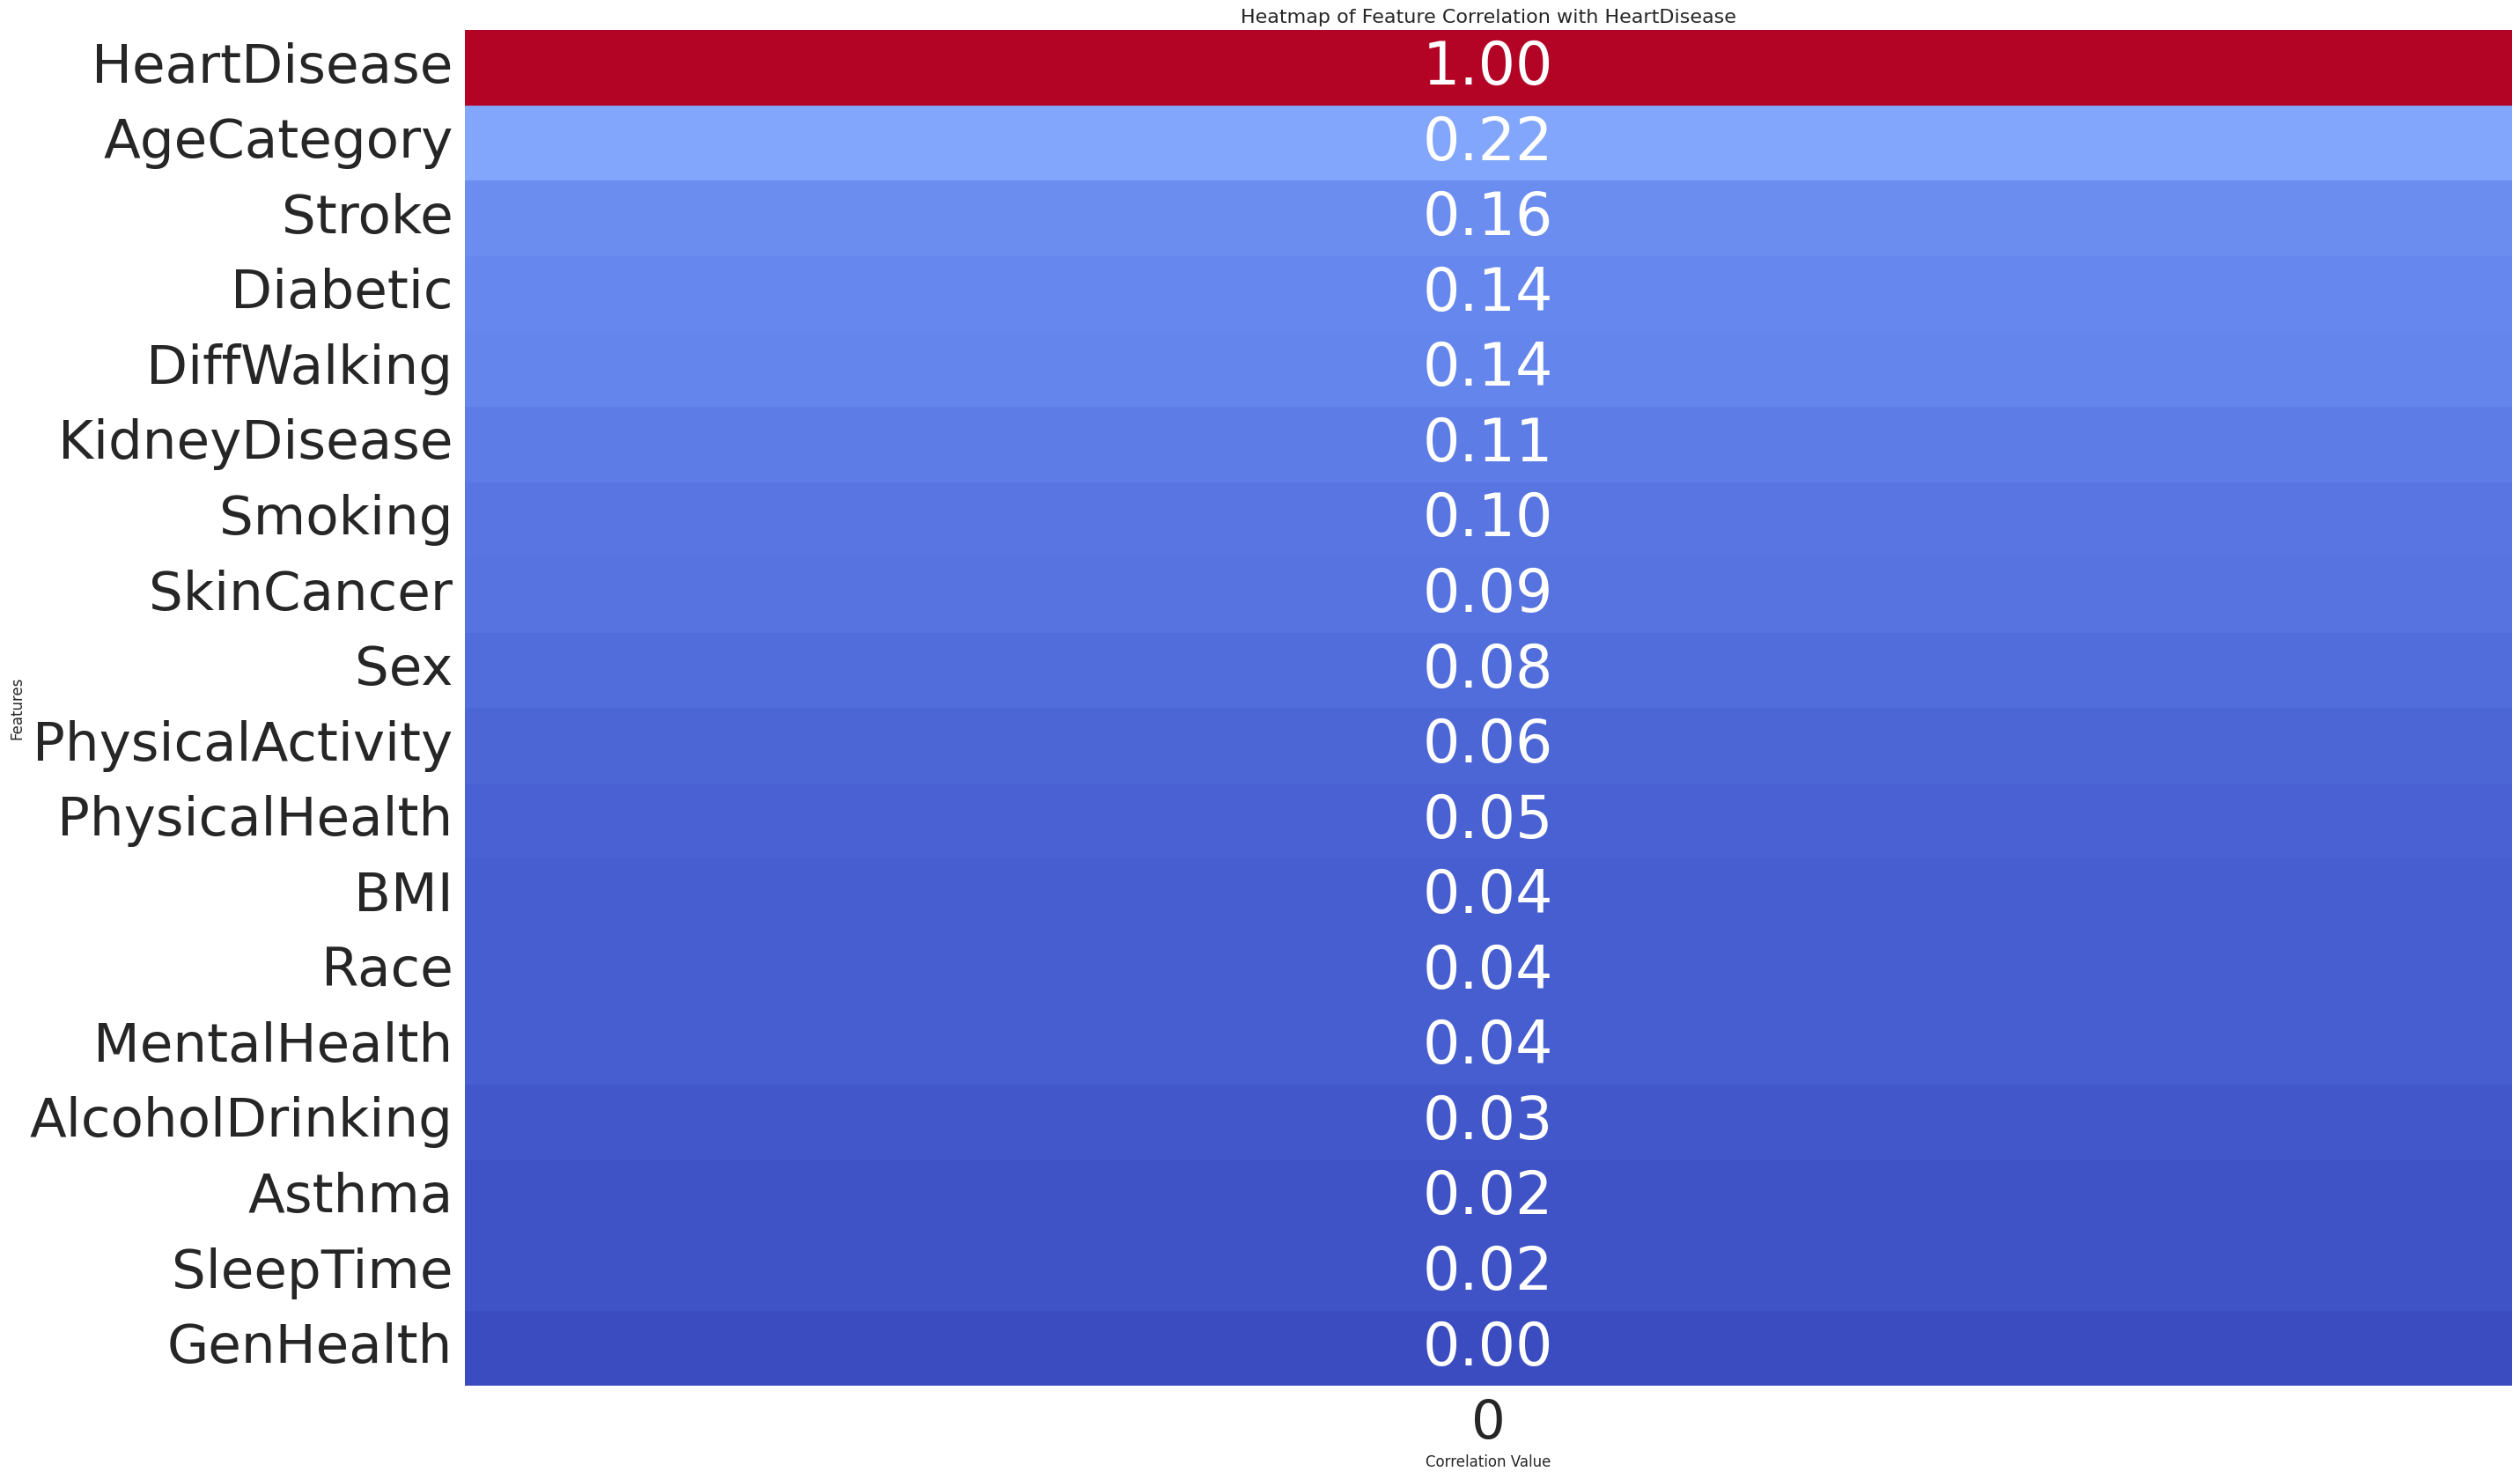

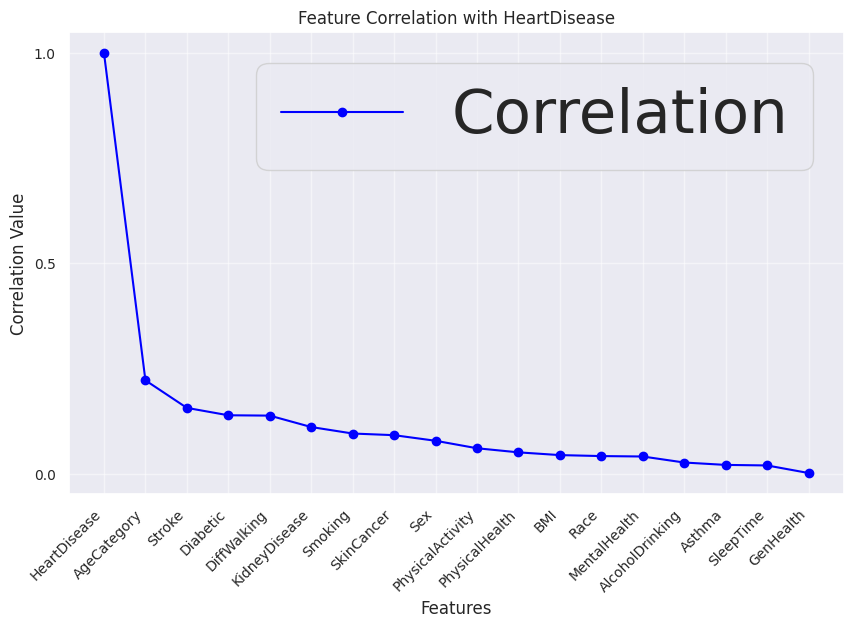

In [19]:
# Correlation with output variable using filtering method
cor = analysis.corr()
cor_target = abs(cor['HeartDisease'])

# Selecting highly correlated features
relevant_features_1 = cor_target[cor_target > 0]
relevant_features_1 = relevant_features_1.sort_values(ascending=False)

# Print relevant features
print("Highly Correlated Features with HeartDisease:")
print(relevant_features_1)

# Data for plotting
features = relevant_features_1.index
correlation_values = relevant_features_1.values

# 1. **Heatmap of Correlation Values**
sns.heatmap(
    relevant_features_1.values.reshape(-1, 1),
    annot=True,
    yticklabels=features,
    cmap="coolwarm",
    cbar=False,
    fmt=".2f"
)
plt.title("Heatmap of Feature Correlation with HeartDisease", fontsize=16)
plt.xlabel("Correlation Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

# 2. **Line Plot of Correlation Values**
plt.figure(figsize=(10, 6))
plt.plot(features, correlation_values, marker='o', color='blue', label="Correlation")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Reduced font size for x-axis
plt.yticks(fontsize=10)  # Reduced font size for y-axis
plt.title("Feature Correlation with HeartDisease", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Value", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()


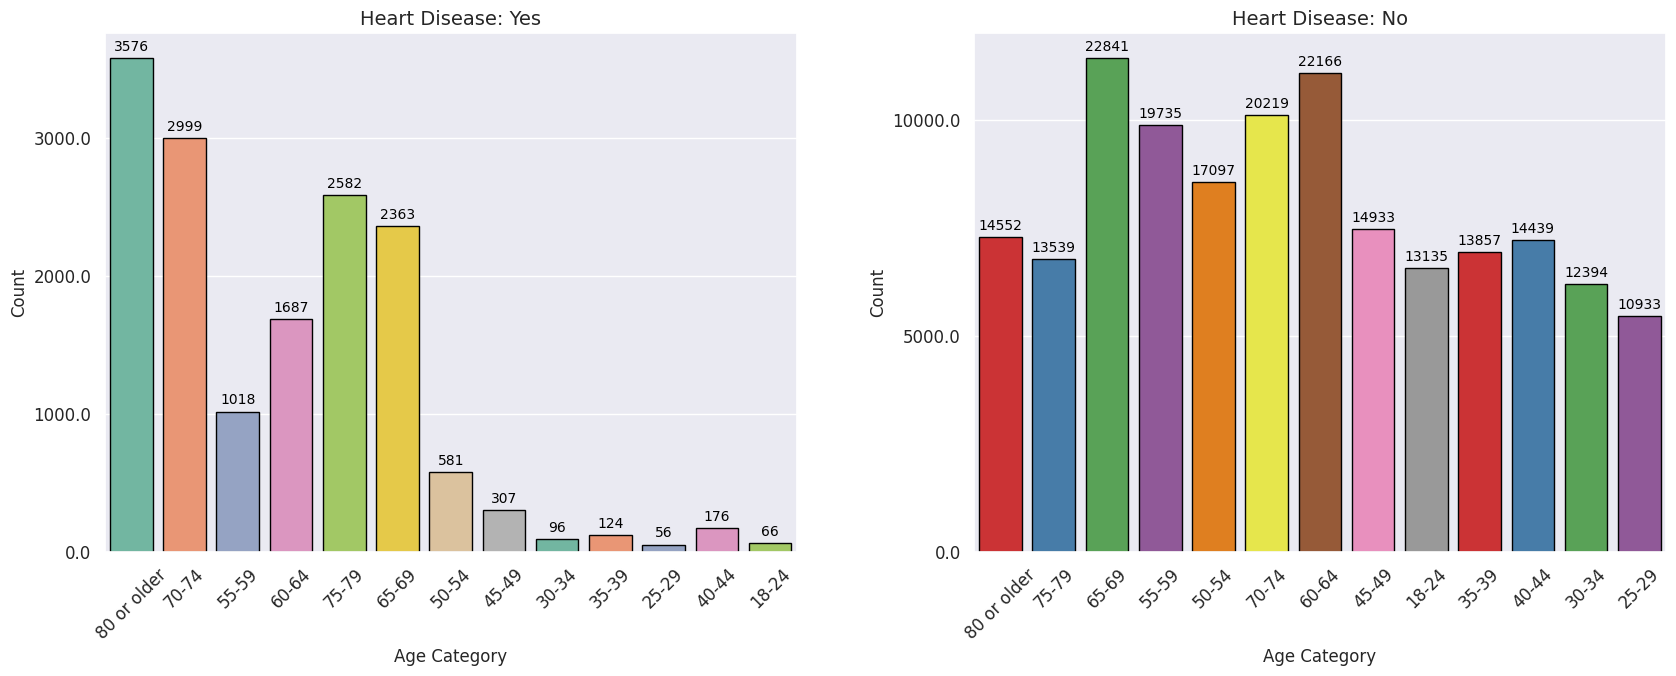

In [20]:
# HeartDisease count based on AgeCategory 

# Create a 1x2 subplot grid with a larger figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Larger figure size

# Countplot for HeartDisease "Yes"
sns.countplot(x='AgeCategory', data=df1[df1['HeartDisease'] == 'Yes'], ax=axes[0], 
              palette='Set2', edgecolor='black')
axes[0].set_title('Heart Disease: Yes', fontsize=14)  # Adjusted title font size
axes[0].set_xlabel('Age Category', fontsize=12)  # Adjusted label font size
axes[0].set_ylabel('Count', fontsize=12)  # Adjusted label font size

# Adjust x and y tick label font sizes
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12, rotation=45)  # Rotate for readability
axes[0].set_yticklabels(axes[0].get_yticks(), fontsize=12)

# Add value labels on top of each bar (integer values)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',  # Convert height to an integer
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     fontsize=10, color='black',
                     xytext=(0, 8), textcoords='offset points')

# Countplot for HeartDisease "No"
sns.countplot(x='AgeCategory', data=df1[df1['HeartDisease'] == 'No'], ax=axes[1], 
              palette='Set1', edgecolor='black')
axes[1].set_title('Heart Disease: No', fontsize=14)  # Adjusted title font size
axes[1].set_xlabel('Age Category', fontsize=12)  # Adjusted label font size
axes[1].set_ylabel('Count', fontsize=12)  # Adjusted label font size

# Adjust x and y tick label font sizes
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12, rotation=45)
axes[1].set_yticklabels(axes[1].get_yticks(), fontsize=12)

# Add value labels on top of each bar (integer values)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',  # Convert height to an integer
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     fontsize=10, color='black',
                     xytext=(0, 8), textcoords='offset points')

# Display the plot with tight layout
plt.tight_layout()
plt.show()


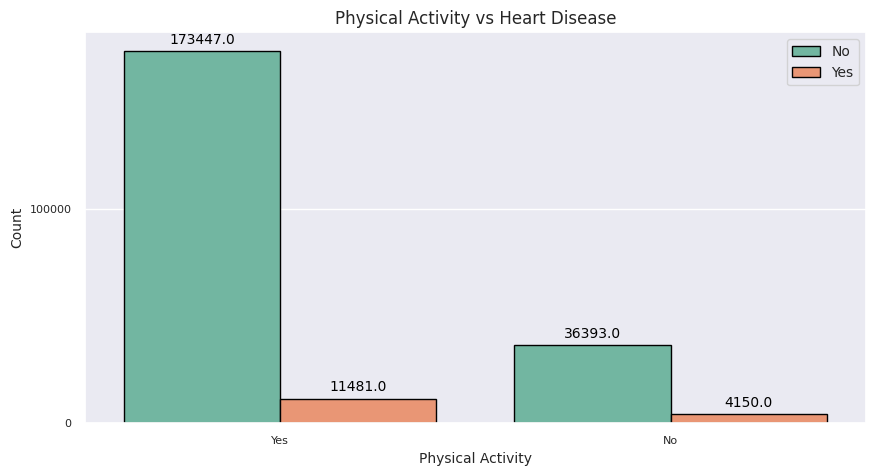

In [21]:
#Physical Activity vs Heart Disease
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the countplot
ax = sns.countplot(x='PhysicalActivity', data=df1, hue='HeartDisease', palette='Set2', edgecolor='black')

# Set the title and labels with smaller font size
ax.set_title("Physical Activity vs Heart Disease", fontsize=12)
ax.set_xlabel("Physical Activity", fontsize=10)
ax.set_ylabel("Count", fontsize=10)

# Add value labels on top of each bar with smaller font size
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',  # Smaller font size for value labels
                xytext=(0, 8), textcoords='offset points')

# Adjust tick label sizes
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Reduce legend font size
plt.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


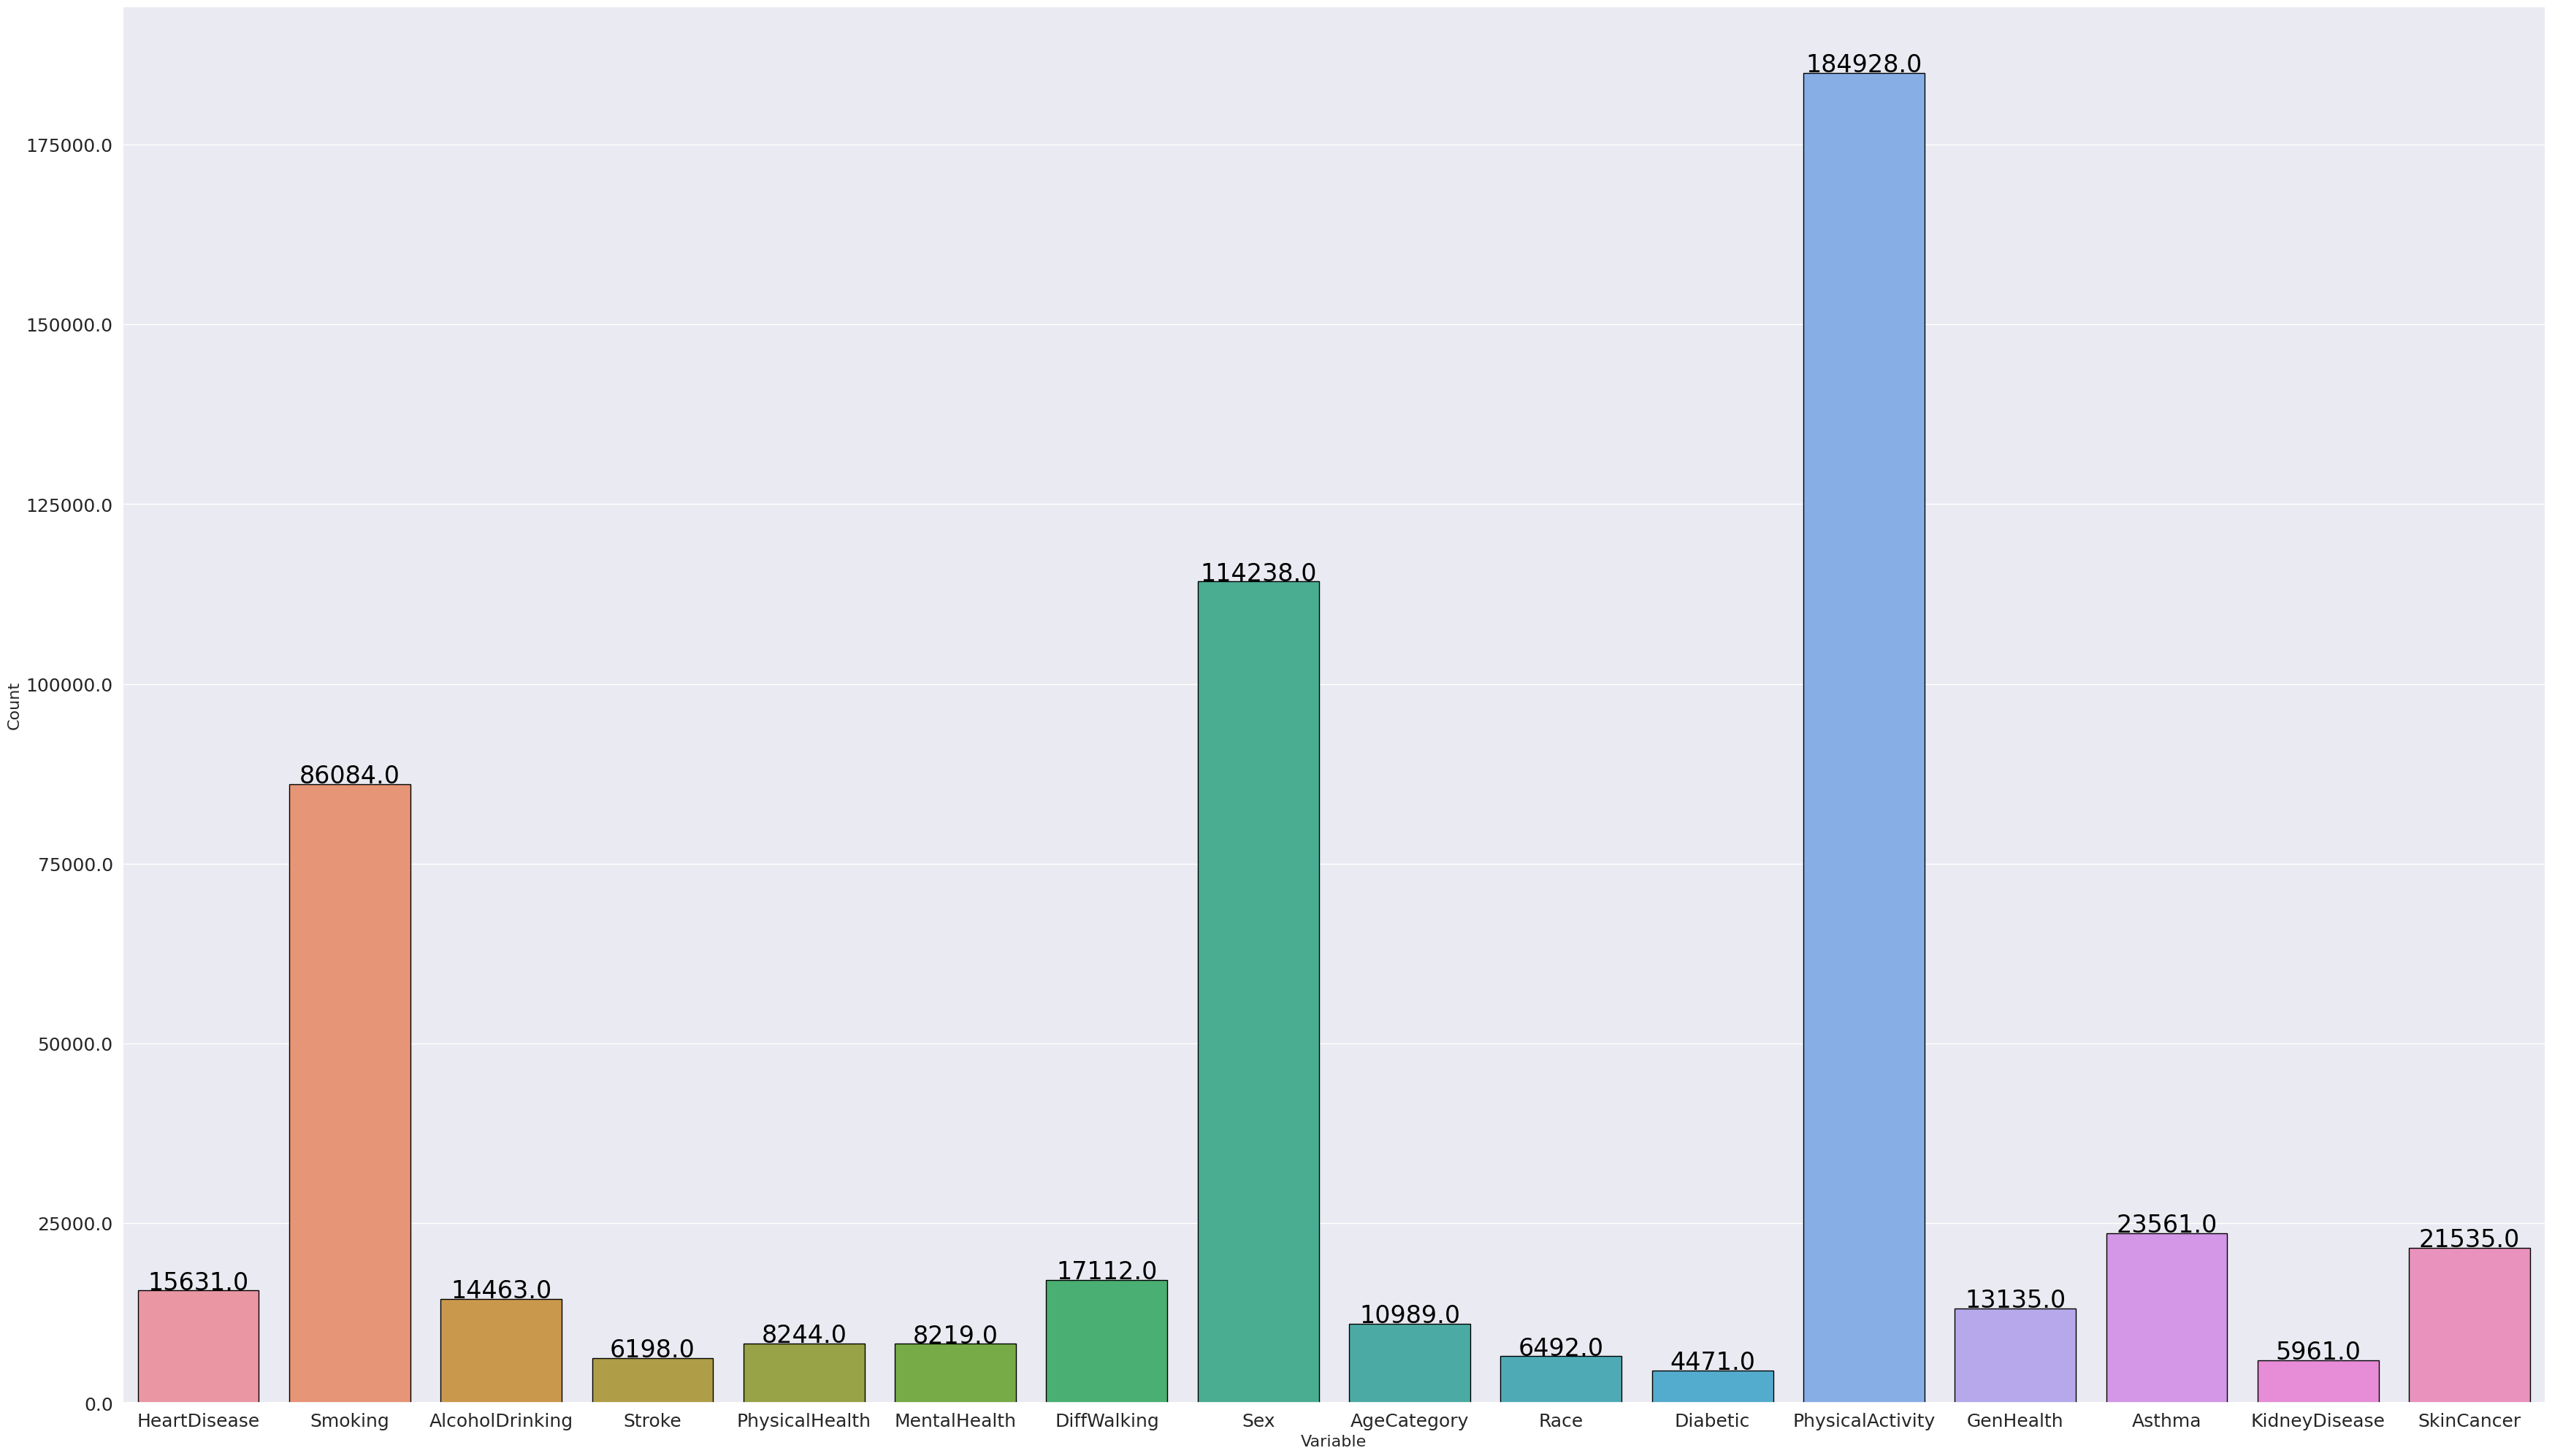

In [22]:

# Melting the data
df_cplot = analysis.melt(value_vars=analysis.columns)
df_cplot = df_cplot[df_cplot["value"] == 1]  # Filter to only include rows with value = 1

# Create the count plot
sns.set(rc={'figure.figsize':(35,20)})  # Set figure size
sns.set(font_scale=0.7)  # Reduce the font size

# Plot
ax = sns.countplot(data=df_cplot, x="variable", edgecolor='black')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=24, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Adjust the text size for the x and y axes
ax.set_xlabel('Variable', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticks(), fontsize=18)
# Show the plot
plt.tight_layout()
plt.show()


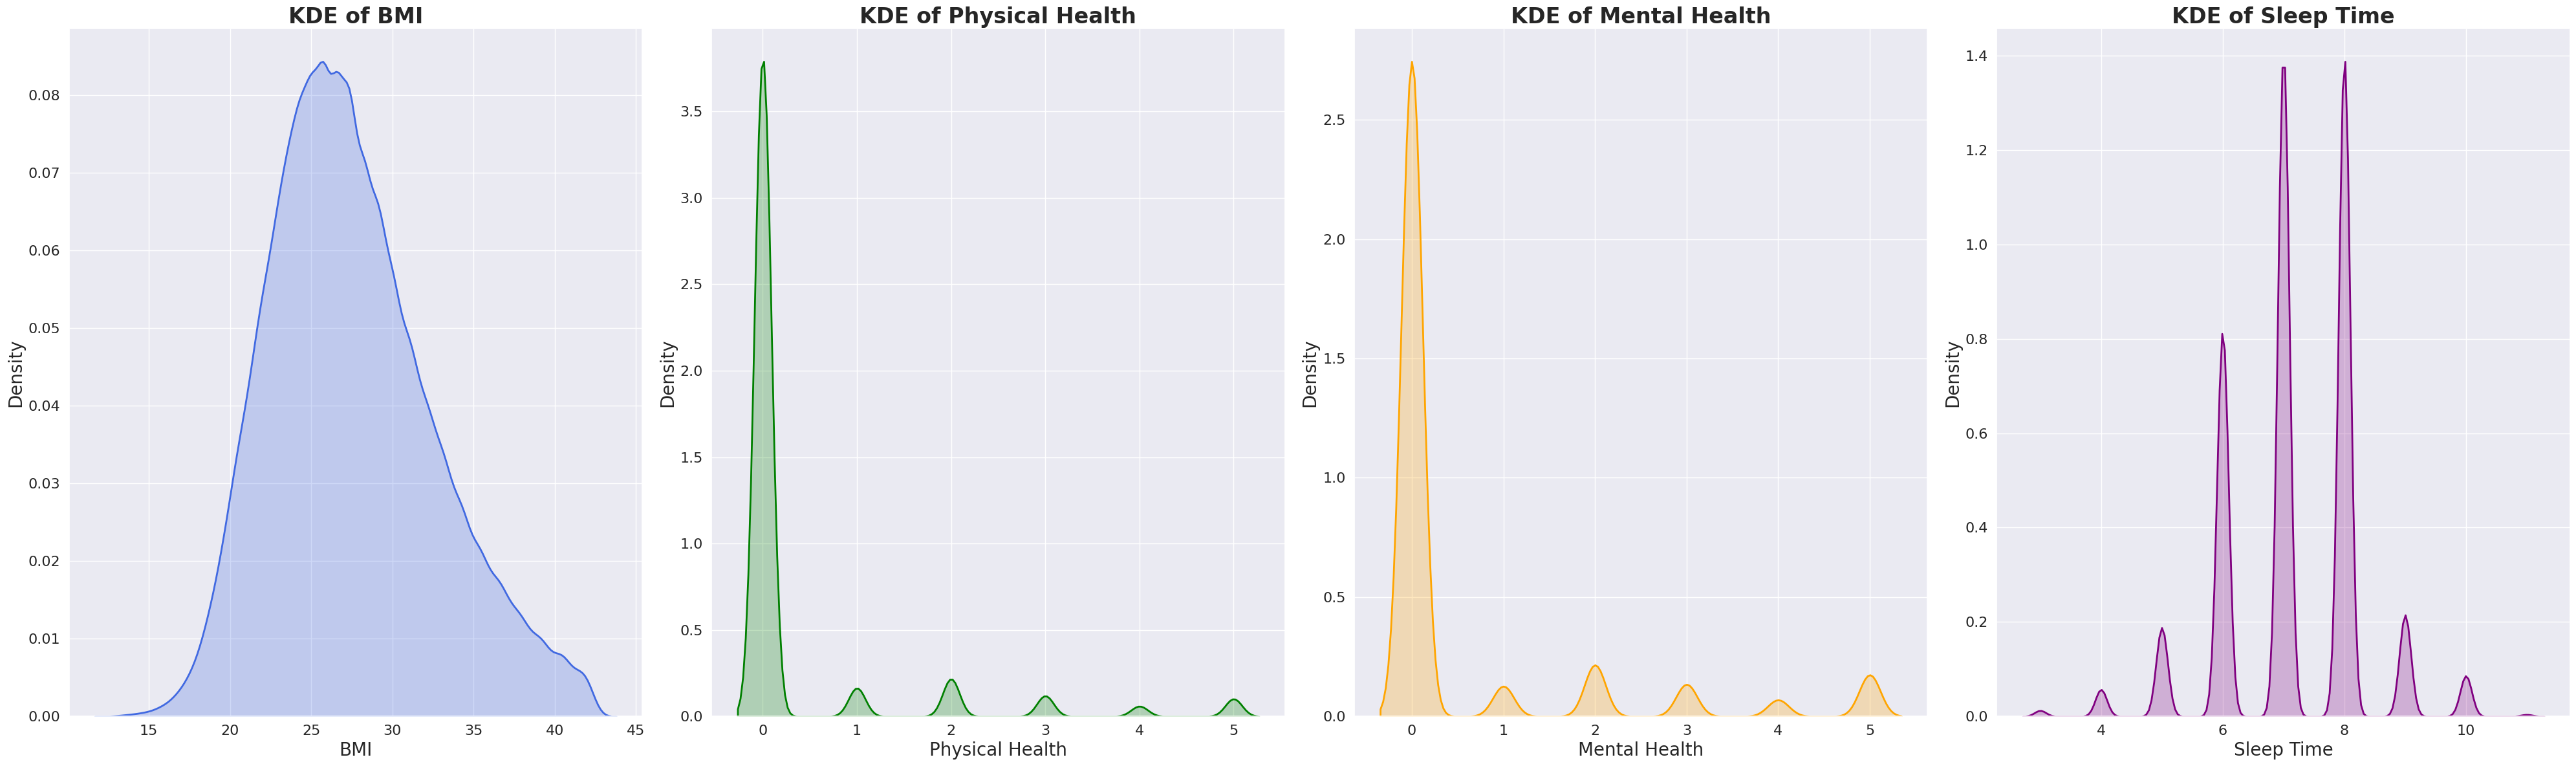

In [23]:
# Set the style and figure size for the plots
sns.set(style="whitegrid", palette="muted")  # Change to a cleaner, muted style
sns.set(rc={'figure.figsize':(40, 12)})  # Increase figure size

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(40, 12))  # First 2 are columns, second 2 are rows

# Plot each KDE with styling improvements
sns.kdeplot(data=df1, x='BMI', ax=axes[0], color='royalblue', shade=True, linewidth=2)
sns.kdeplot(data=df1, x='PhysicalHealth', ax=axes[1], color='green', shade=True, linewidth=2)
sns.kdeplot(data=df1, x='MentalHealth', ax=axes[2], color='orange', shade=True, linewidth=2)
sns.kdeplot(data=df1, x='SleepTime', ax=axes[3], color='purple', shade=True, linewidth=2)

# Customize each plot with appropriate labels and titles
axes[0].set_xlabel('BMI', fontsize=20)
axes[0].set_ylabel('Density', fontsize=20)
axes[0].set_title('KDE of BMI', fontsize=24, weight='bold')

axes[1].set_xlabel('Physical Health', fontsize=20)
axes[1].set_ylabel('Density', fontsize=20)
axes[1].set_title('KDE of Physical Health', fontsize=24, weight='bold')

axes[2].set_xlabel('Mental Health', fontsize=20)
axes[2].set_ylabel('Density', fontsize=20)
axes[2].set_title('KDE of Mental Health', fontsize=24, weight='bold')

axes[3].set_xlabel('Sleep Time', fontsize=20)
axes[3].set_ylabel('Density', fontsize=20)
axes[3].set_title('KDE of Sleep Time', fontsize=24, weight='bold')

# Adjust the tick labels for all axes
for ax in axes:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>


In [24]:
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over columns and apply LabelEncoder to object type columns
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col])

# Display the first few rows of the transformed dataframe
df1.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0



# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Oversampling(SMOTETomek) over Imbalance Dataset</p>



In [25]:
# Assuming you have already loaded your dataset and performed label encoding
# df1 is your dataset after encoding and preprocessing

# Define your features and target variable
X = df1.drop('HeartDisease', axis=1)  # Features
y = df1['HeartDisease']  # Target

# Apply SMOTETomek for balancing the dataset
sm = SMOTETomek(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Combine the X_train, y_train, X_test, and y_test into DataFrames
trainset = pd.concat([X_train, y_train], axis=1)
testset = pd.concat([X_test, y_test], axis=1)




In [26]:
# Displaying shapes of train and test sets for both X and y

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (332470, 17)
Shape of X_test: (83118, 17)
Shape of y_train: (332470,)
Shape of y_test: (83118,)


In [27]:
# Save the train and test sets to CSV files
trainset.to_csv('trainset.csv', index=False)
testset.to_csv('testset.csv', index=False)


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Train, Evaluate and Compare Classification Models without Hyperparameter Tuning</p>


In [28]:
models = [
   LogisticRegression(),
   LinearSVC(random_state=42),
   SGDClassifier(),
   KNeighborsClassifier(),
   RandomForestClassifier(random_state=42),
   DecisionTreeClassifier(random_state=42),
   GradientBoostingClassifier(random_state=42),
   XGBClassifier(random_state=42),
   AdaBoostClassifier(random_state=42),
   LinearDiscriminantAnalysis()
   ]
     

In [29]:

names = ['Logistic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']  

models_columns = ['Model Name', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
models_compare = pd.DataFrame(columns=models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)  # Predict using the trained model
    
    # Confusion matrix for precision, recall, f1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # AUC calculation using predicted probabilities, not the confusion matrix
    if hasattr(ml, "predict_proba"):
        y_prob = ml.predict_proba(X_test)[:, 1]  # Get probability of the positive class
        auc_value = roc_auc_score(y_test, y_prob)  # Calculate AUC using probabilities
        
        # Convert probabilities to binary predictions (0 or 1)
        y_pred_binary = (y_prob >= 0.5).astype(int)
    else:
        y_pred_binary = y_pred  # If the model doesn't have predict_proba, use the predicted labels
        auc_value = None  # Set AUC to None if no probabilities are available
    
    # Adding values to the dataframe with rounding to 3 decimal places
    models_compare.loc[row_index, 'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = f"{round(ml.score(X_train, y_train) * 100, 3)}%"  # Convert to percentage
    models_compare.loc[row_index, 'Test Accuracy'] = f"{round(ml.score(X_test, y_test) * 100, 3)}%"  # Convert to percentage
    models_compare.loc[row_index, 'Precision'] = f"{round(precision * 100, 3)}%"  # Precision as percentage
    models_compare.loc[row_index, 'Recall'] = f"{round(recall * 100, 3)}%"  # Recall as percentage
    models_compare.loc[row_index, 'F1 Score'] = f"{round(f1 * 100, 3)}%"  # No need to multiply by 100 for f1 score
    if auc_value is not None:
        models_compare.loc[row_index, 'AUC'] = f"{round(auc_value * 100, 3)}%"  # AUC score as percentage
    else:
        models_compare.loc[row_index, 'AUC'] = "N/A"  # If AUC is not calculated, mark as N/A
    
    row_index += 1
    
# Sorting by Test Accuracy in descending order
models_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

# Display the final comparison table
models_compare


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
4,RandomForest,99.687%,92.052%,91.262%,93.01%,92.128%,97.086%
5,DecisionTree,99.69%,88.929%,88.124%,89.985%,89.045%,89.105%
3,KNN,90.257%,86.359%,80.763%,95.455%,87.496%,93.299%
7,XGBOOST,85.045%,84.63%,84.182%,85.286%,84.73%,93.067%
6,GradientBoost,80.889%,80.82%,79.088%,83.797%,81.374%,89.797%
8,ADABoost,77.892%,77.927%,76.294%,81.032%,78.591%,86.416%
2,SGD,73.355%,73.656%,71.508%,78.647%,74.908%,N/A
9,LDA,73.309%,73.621%,70.693%,80.695%,75.363%,80.465%
0,Logistic Regression,73.287%,73.587%,71.372%,78.77%,74.888%,80.44%
1,SVMLinear,58.658%,58.72%,83.812%,21.615%,34.367%,N/A


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Hyperparameter Tuning with GridSearchCV</p>
We applied GridSearchCV over multiple Supervised ML Classifiers to tune to get best outcome


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Train, Evaluate and Compare Classification Models with Hyperparameter Tuning</p>


In [30]:
# List of tuned models for validation
tuned_models = [
    LogisticRegression(C=2, multi_class='ovr', random_state=42, solver='liblinear'),
    LinearSVC(C=1, max_iter=2500, random_state=42, tol=0.001),
    SGDClassifier(loss='log', max_iter=200, penalty='l1', random_state=42, tol=1e-05),
    KNeighborsClassifier(metric='manhattan'),
    RandomForestClassifier(criterion='entropy', random_state=42),
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    GradientBoostingClassifier(max_depth=20, n_estimators=100, random_state=42),
    XGBClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    LinearDiscriminantAnalysis()
]

In [31]:
names = ['Logistic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']
models_columns = ['Model Name', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
tuned_models_compare = pd.DataFrame(columns=models_columns)

row_index = 0

for models_name, ml in zip(names, tuned_models):
    try:
        ml.fit(X_train, y_train)
        y_pred = ml.predict(X_test)
        
        # Metrics Calculation
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # AUC Calculation
        if hasattr(ml, "predict_proba"):
            y_prob = ml.predict_proba(X_test)[:, 1] if y_test.ndim == 1 else ml.predict_proba(X_test)
            auc_value = roc_auc_score(y_test, y_prob, multi_class='ovr' if y_test.ndim > 1 else 'raise')
        else:
            auc_value = "N/A"
        
        # Add values to DataFrame
        tuned_models_compare.loc[row_index] = {
            'Model Name': models_name,
            'Train Accuracy': f"{round(ml.score(X_train, y_train) * 100, 3)}%",
            'Test Accuracy': f"{round(ml.score(X_test, y_test) * 100, 3)}%",
            'Precision': f"{round(precision * 100, 3)}%",
            'Recall': f"{round(recall * 100, 3)}%",
            'F1 Score': round(f1, 3),
            'AUC': f"{round(auc_value * 100, 3)}%" if auc_value != "N/A" else "N/A"
        }
        row_index += 1
    except Exception as e:
        print(f"Error with model {models_name}: {e}")
        continue

# Sort DataFrame
tuned_models_compare.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

# Display the table
tuned_models_compare


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
6,GradientBoost,99.352%,93.201%,93.223%,93.201%,0.932,98.084%
4,RandomForest,99.687%,92.075%,92.095%,92.075%,0.921,97.056%
5,DecisionTree,99.69%,89.141%,89.164%,89.141%,0.891,89.315%
3,KNN,90.862%,87.021%,88.043%,87.021%,0.869,93.711%
7,XGBOOST,85.045%,84.63%,84.636%,84.63%,0.846,93.067%
8,ADABoost,77.892%,77.927%,78.035%,77.927%,0.779,86.416%
2,SGD,73.314%,73.647%,74.165%,73.647%,0.735,80.483%
0,Logistic Regression,73.303%,73.629%,73.882%,73.629%,0.736,80.485%
9,LDA,73.309%,73.621%,74.103%,73.621%,0.735,80.465%
1,SVMLinear,73.098%,73.293%,74.49%,73.293%,0.730,N/A


# <p style="background-color:#1877c5;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Summary</p>

The Heart Disease Prediction models were evaluated on several key metrics, with RandomForest delivering the best train accuracy of **99.687%**, test accuracy of 92.075%, and a strong F1 Score of 0.921. **The GradientBoost model demonstrated excellent performance, with a train accuracy of 99.352% and highest test accuracy of 93.201%, alongside an AUC of 98.084% and a 0.932 F1 Score.** DecisionTree also showed strong results with an F1 Score of 0.891. In contrast, models like SVMLinear and Logistic Regression exhibited lower performance across accuracy, F1 Score, and AUC metrics, highlighting the superiority of ensemble methods like RandomForest and GradientBoost for heart disease prediction.
